# Logistic Regression

## Hands-On: Iris Database

In [26]:
#ENG: Import libraries

# Pacotes de manipulação de dados
import numpy as np
import pandas as pd

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de data science
from sklearn import linear_model
from sklearn.metrics import accuracy_score

### Import database

In [27]:
df = pd.read_csv('iris.csv')
df

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,Tipo_Orquidea
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


### Exploratory Data Analysis (EDA)

Start with data visualization (pairplot) to verify the distribution of each variable and their relationship with the target variable (Planta_Orquidea)

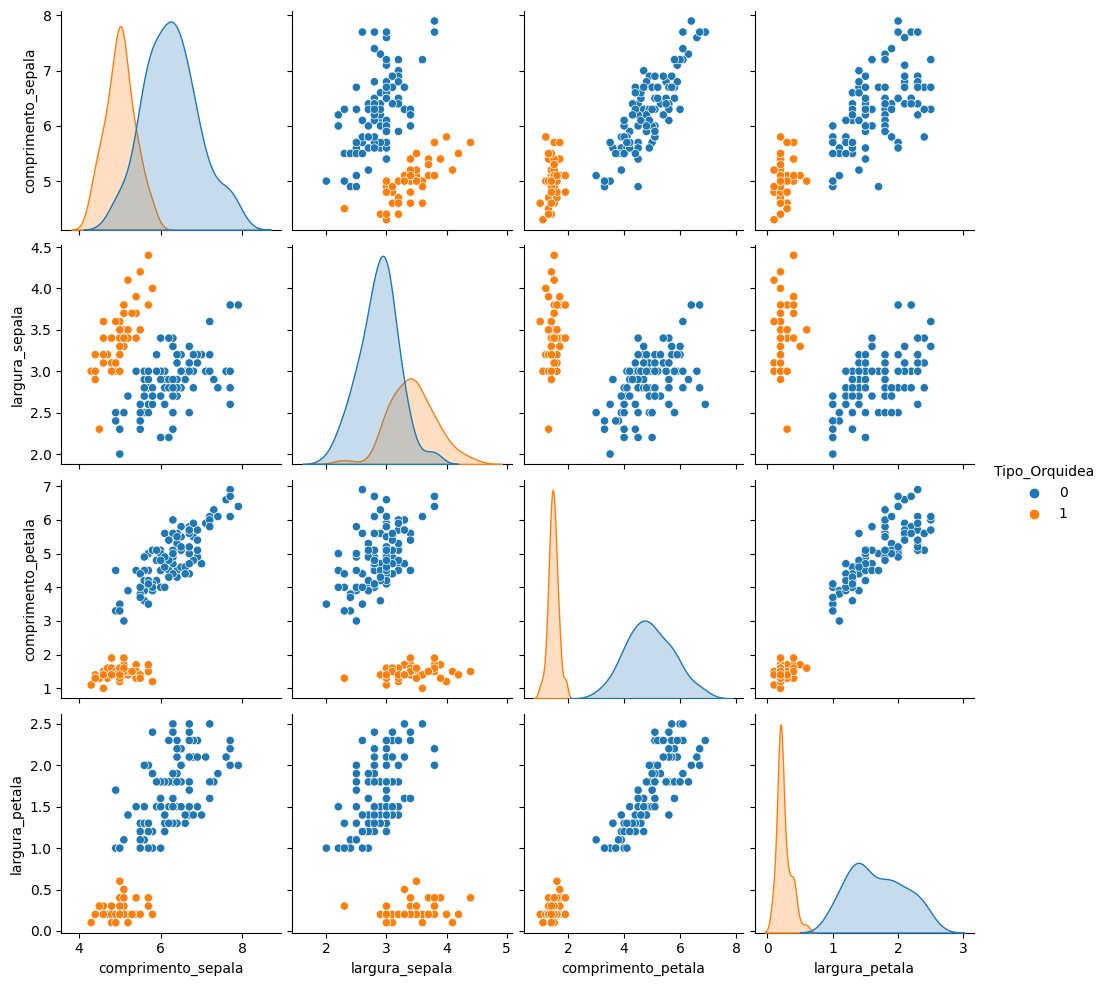

In [28]:
sns.pairplot(df, hue='Tipo_Orquidea');

### Initial adjustment to use the logistic regression from Scikit Learn

In [29]:
#ENG: define target and feature variables

# Variável resposta
y = df['Tipo_Orquidea']

# Variáveis explicativas
x = df[['comprimento_sepala',
        'largura_sepala',
        'comprimento_petala',
        'largura_petala']]

In [30]:
#ENG: define the structure and model configurations

# Define estrutura e configurações do modelo
modelo = linear_model.LogisticRegression(random_state=42,
                                         fit_intercept=True)

# Ajusta o modelo
modelo.fit(x, y)

LogisticRegression(random_state=42)

In [31]:
#ENG: printing the coefficients from the model

# Obtenção dos coeficientes do modelo
print('Intercepto: {}' .format(modelo.intercept_))
print('Coeficientes: {}' .format(modelo.coef_))

Intercepto: [6.69040651]
Coeficientes: [[-0.44501376  0.89999242 -2.32353827 -0.97345836]]


### Creating the estimated "y" variable using predict from the model, with the threshold of 0.5 for g(z).

In [32]:
# Classificação estimada utilizando métodos do Scikit Learn
df['y_estimado'] = modelo.predict(x)
df.head(10)

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,Tipo_Orquidea,y_estimado
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1
5,5.4,3.9,1.7,0.4,1,1
6,4.6,3.4,1.4,0.3,1,1
7,5.0,3.4,1.5,0.2,1,1
8,4.4,2.9,1.4,0.2,1,1
9,4.9,3.1,1.5,0.1,1,1


### Calculating the accuracy of the model

In [33]:
# Realizando o cálculo utilizando Scikit-Learn
accuracy_score(df['Tipo_Orquidea'], df['y_estimado'])

1.0

## Interpreting the model

### Interpreting each coefficient

In [34]:
np.exp(modelo.intercept_)

array([804.64928527])

In [35]:
np.exp(modelo.coef_)

array([[0.64081546, 2.45958447, 0.09792648, 0.3777743 ]])

**Adjusted Model**

Tipo Orquídea = $\beta_0$ + $\beta_1$ * Sepal Length + $\beta_2$ * Sepal Width + $\beta_3$ * Petal Length + $\beta_4$ * Petal Width

$e^{\beta_0}$: chance of a flower with 0 width and length for the petal and sepal to be type 1 is 805.

$e^{\beta_1}$: Every 1cm increase in sepal length decreases the chance of the flower belonging to type 1 by 36%, keeping everything else constant.

$e^{\beta_2}$: Every 1cm increase in sepal width increases the chance of the flower belonging to type 1 by 146%, keeping everything else constant.

$e^{\beta_3}$: Every 1cm increase in petal length decreases the chance of the flower belonging to type 1 by 90%, keeping everything else constant.

$e^{\beta_4}$: Every 1cm increase in petal width decreases the chance of the flower belonging to type 1 by 62%, keeping everything else constant.

## Model diagnostics

### Preparing dataframe with real and predicted values

In [36]:
df_diagnostics = df[['Tipo_Orquidea','y_estimado']].copy()
df_diagnostics.head()

,Tipo_Orquidea,y_estimado
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [37]:
#ENG: defining the threshold for the predicted Y as 0.5

# Definindo o corte de probabilidade para definir o Y Predito
corte = 0.5
Y_Predito = np.where(df_diagnostics['y_estimado'] >= corte, 1 , 0)

In [38]:
Y_Predito

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Confusion Matrix

In [39]:
#ENG: importing the sklearn library to create the confusion matrix

# Pacote que cria a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [40]:
cm = confusion_matrix(df_diagnostics['Tipo_Orquidea'], Y_Predito)
cm

array([[100,   0],
       [  0,  50]])

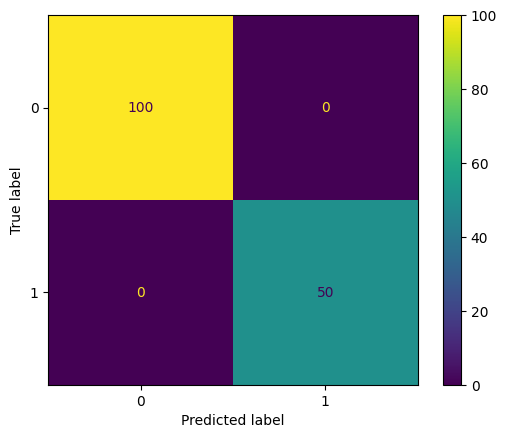

In [41]:
ConfusionMatrixDisplay(confusion_matrix=cm,).plot();

### Precision, Recall and F1 Score

In [42]:
#ENG: importing library to calculate precision, recall and F1 Score

# Pacote para calcular as métricas da matriz de confusão
from sklearn.metrics import classification_report

In [43]:
print(classification_report(df_diagnostics['Tipo_Orquidea'],Y_Predito))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



For a threshold set as 0.5, we have the following conclusions:

* **Precision**: 1,00 >> From all lines classified by the model as 1, 100% were actually 1.
* **Recall**: 1,00 >> From all lines actually classified as 1, the model was successfully able to predict it in all cases (100%).  

In [44]:
# Pacote para calcular as métricas da Curva ROC
from sklearn.metrics import roc_curve

In [45]:
#ENG: Calculating the TPR (True Positive Rate) and FPR (False Positive Rate)

# Calcula a Sensibilidade (True Positive Rate = TPR) e também a métrica "1 - Especificidade" (False Positive Rate = FPR)
# Lembre-se que para calcular a curva precisamos do Target (Y Real) e a probabilidade do modelo de classificação escolhido [ Prob (Y = 1) ]

fpr, tpr, thresholds = roc_curve(df_diagnostics['Tipo_Orquidea'], df_diagnostics['y_estimado'])

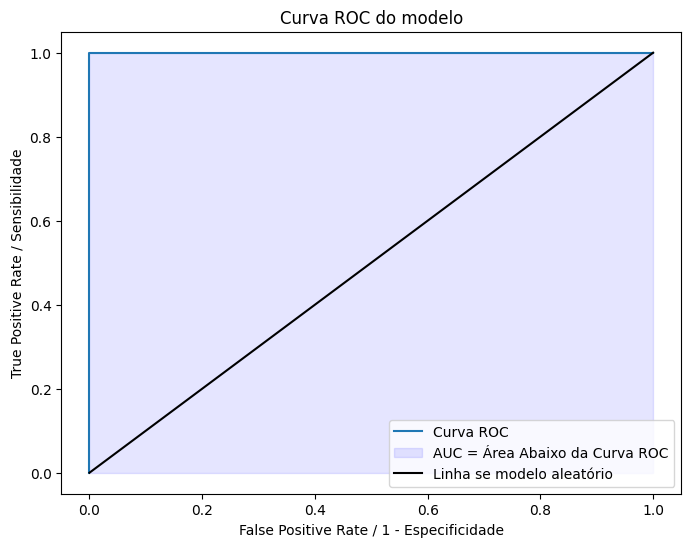

In [46]:
#ENG: Plotting the ROC curve and identifying the AUC

plt.figure(figsize=(8,6))

plt.plot(fpr,tpr, label='Curva ROC')
plt.fill_between(fpr,tpr,color='blue',alpha= 0.1,label = 'AUC = Área Abaixo da Curva ROC')
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),color='black',label='Linha se modelo aleatório')

plt.title("Curva ROC do modelo")
plt.ylabel('True Positive Rate / Sensibilidade')
plt.xlabel('False Positive Rate / 1 - Especificidade')
plt.legend();

In [47]:
from sklearn.metrics import roc_auc_score

In [48]:
#ENG: Calculating the AUC score

# Calcula a área abaixo da curva ROC
roc_auc_score(df_diagnostics['Tipo_Orquidea'], df_diagnostics['y_estimado'])

1.0